In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [2]:
# function to read train data for each situation and test data for each situation
def dfMaker(folderPath):
    
    li = []

    for file in os.listdir(folderPath):
        filename = os.fsdecode(file)
        filepath = folderPath + filename
        df = pd.read_csv(filepath, index_col = None, header =0)
        
        # adding a column to the dataframe that has '1' if the scanner was more than 6ft away from advertiser 
        # and '0' if the scanner was less than 6ft away from advertiser
        
        if "in6" in filename:
            df["SAFE"] = 0
        elif "out6" in filename:
            df["SAFE"] = 1
        else:
            return "Cannot determine if SAFE or NOT SAFE"
            
        li.append(df)

    return pd.concat(li, axis=0, ignore_index=True)

In [3]:
# function to create ROC Curves for models and prints out accuracy of models

def ROC_Curve_Maker(mainFolderPath, title, filterAd):
    
    # placing train and test files into pandas dataframes
    train_data = dfMaker(mainFolderPath + '/train/')
    test_data = dfMaker(mainFolderPath + '/test/')
    
    # filtering scanned devices in case filters were not set when scanning data
    train_data = train_data[train_data.ADDRESS == filterAd]
    test_data = test_data[test_data.ADDRESS == filterAd]
    
    # assigning data to x and y, reshaping x data to fit logistic regression model
    x = train_data.RSSI.values.reshape(-1,1)
    y = train_data.SAFE
    x_test = test_data.RSSI.values.reshape(-1,1)
    y_test = test_data.SAFE
    
    # creaing and fitting logistic regression model
    lg = LogisticRegression()
    lg_model = lg.fit(x, y)
    
    # get an array for the True Positive Rate for each data point
    lg_probs = lg_model.predict_proba(x_test)[:,1]
    
    # get an array for No Skill Model
    ns_probs = [0 for _ in range(len(y_test))]
    
    # find false positive rate, true positive rate, and thresholds for each model
    ns_fpr, ns_tpr, thresholds = metrics.roc_curve(y_test, ns_probs)
    lr_fpr, lr_tpr, thresholds2 = metrics.roc_curve(y_test, lg_probs)
    
    # display curve
    plt.figure(figsize = (5,5))
    plt.plot(ns_fpr, ns_tpr, linestyle = '--', color = 'r', label = 'No Skill')
    plt.plot(lr_fpr, lr_tpr, marker = '.', color = 'orange', label = 'Logistic')
    plt.legend(loc = "lower right")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.show()

/Users/Mehul/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


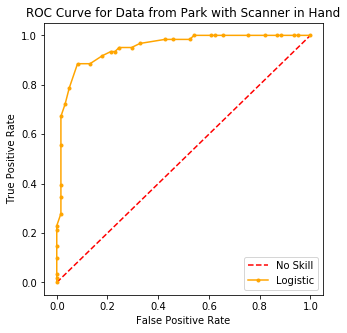

In [4]:
ROC_Curve_Maker('/Users/Mehul/mit/inPark/noObs', 'ROC Curve for Data from Park with Scanner in Hand', "DC:A6:32:2C:42:BC")

/Users/Mehul/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


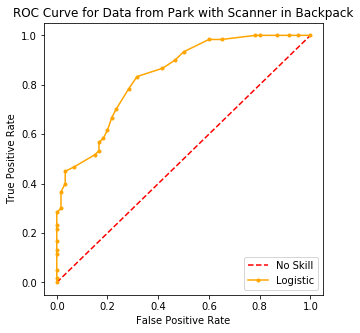

In [5]:
ROC_Curve_Maker('/Users/Mehul/mit/inPark/backpack', 'ROC Curve for Data from Park with Scanner in Backpack', "DC:A6:32:2C:42:BC")

/Users/Mehul/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


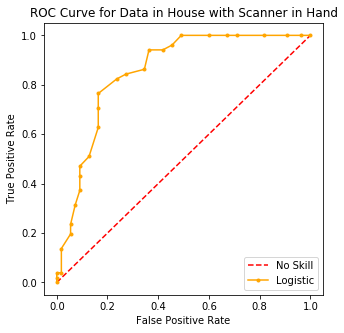

In [6]:
ROC_Curve_Maker('/Users/Mehul/mit/inHouse/noWalls', 'ROC Curve for Data in House with Scanner in Hand', "DC:A6:32:2C:42:BC")

/Users/Mehul/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


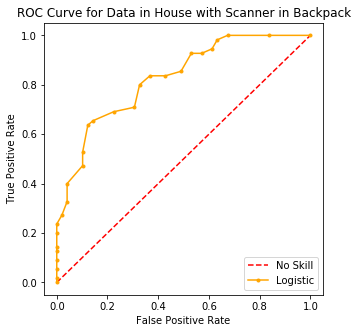

In [7]:
ROC_Curve_Maker('/Users/Mehul/mit/inHouse/backpack', 'ROC Curve for Data in House with Scanner in Backpack', "DC:A6:32:2C:42:BC")